# SHAP values for categorical features with CatBoost

Dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

from catboost import CatBoostClassifier
import xgboost as xgb

import shap
# %shap.initjs()

from sklearn.metrics import accuracy_score,confusion_matrix
from ucimlrepo import fetch_ucirepo 
import os

dp = os.environ.get('pub_data')

In [63]:
# load data
data = pd.read_csv(dp + '/mushrooms.csv')
df = data

# get features
y = df['class']
y = y.astype('category').cat.codes
X = df.drop('class', axis=1)

In [66]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# # metadata 
# print(mushroom.metadata) 
  
# # variable information 
# print(mushroom.variables) 

df = pd.concat([mushroom.data.targets, mushroom.data.features], axis=1)

# data (as pandas dataframes) 
y = mushroom.data.targets 
y = y.astype('category').squeeze().cat.codes

# get features
X = mushroom.data.features 
X.fillna("missing", inplace=True)

print(len(df))

8124


/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_35641/2878736397.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna("missing", inplace=True)


## XGBoost

In [79]:
# Create dummy variables for the cate gorical features
X_dummy = pd.get_dummies(X)

In [81]:
# Fit Model
model = xgb.XGBClassifier()
model.fit(X_dummy, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## CatBoost

In [85]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))

model.fit(X, y, cat_features)

# Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

0:	learn: 0.6660194	total: 14.4ms	remaining: 274ms
1:	learn: 0.6373576	total: 18.9ms	remaining: 170ms
2:	learn: 0.6125475	total: 22.6ms	remaining: 128ms
3:	learn: 0.5880232	total: 26.2ms	remaining: 105ms
4:	learn: 0.5652512	total: 30.2ms	remaining: 90.5ms
5:	learn: 0.5428184	total: 34.3ms	remaining: 80ms
6:	learn: 0.5222711	total: 38.4ms	remaining: 71.4ms
7:	learn: 0.5016943	total: 42.6ms	remaining: 63.9ms
8:	learn: 0.4779907	total: 45.5ms	remaining: 55.6ms
9:	learn: 0.4601680	total: 48.5ms	remaining: 48.5ms
10:	learn: 0.4447001	total: 52.7ms	remaining: 43.1ms
11:	learn: 0.4281286	total: 56.8ms	remaining: 37.9ms
12:	learn: 0.4125468	total: 61ms	remaining: 32.8ms
13:	learn: 0.3990776	total: 64.9ms	remaining: 27.8ms
14:	learn: 0.3861614	total: 68.4ms	remaining: 22.8ms
15:	learn: 0.3724813	total: 72.7ms	remaining: 18.2ms
16:	learn: 0.3560532	total: 77.4ms	remaining: 13.7ms
17:	learn: 0.3448969	total: 82.9ms	remaining: 9.21ms
18:	learn: 0.3331749	total: 87.4ms	remaining: 4.6ms
19:	learn: 0

0.9852289512555391

## Standard SHAP values

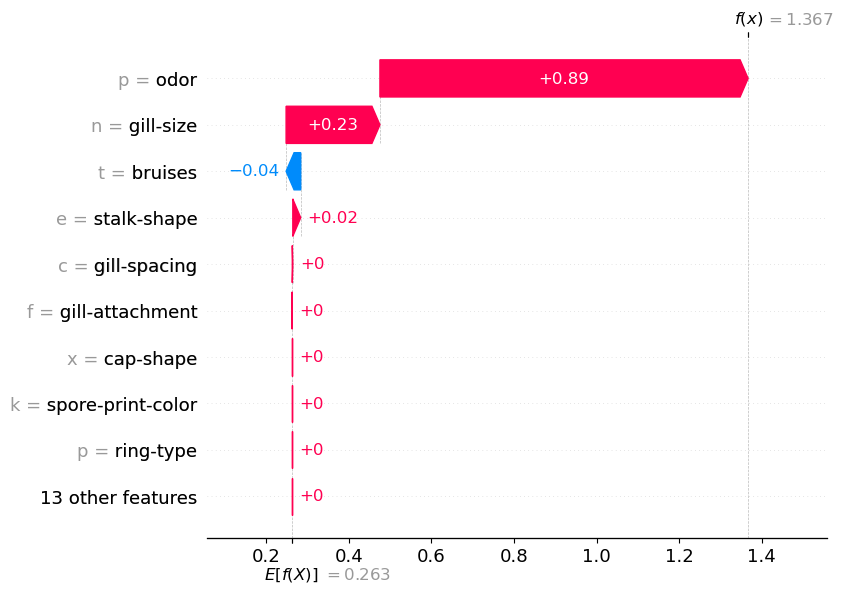

In [87]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0],show=False)

# plt.savefig('../../../figures/waterfall.png', dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

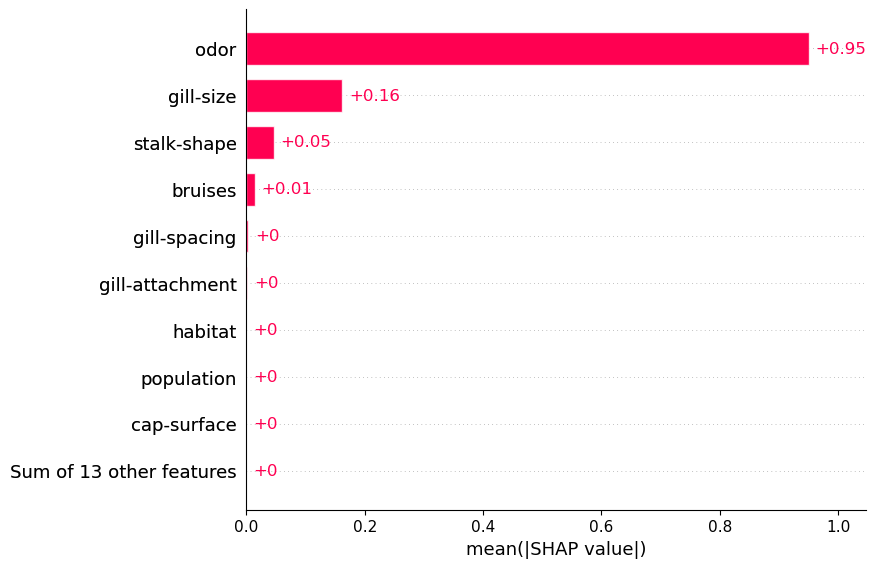

In [88]:
# Mean SHAP
shap.plots.bar(shap_values,show=False)

# plt.savefig('../../../figures/mean_shap.png', dpi=100, bbox_inches='tight',  facecolor='white')
plt.show()

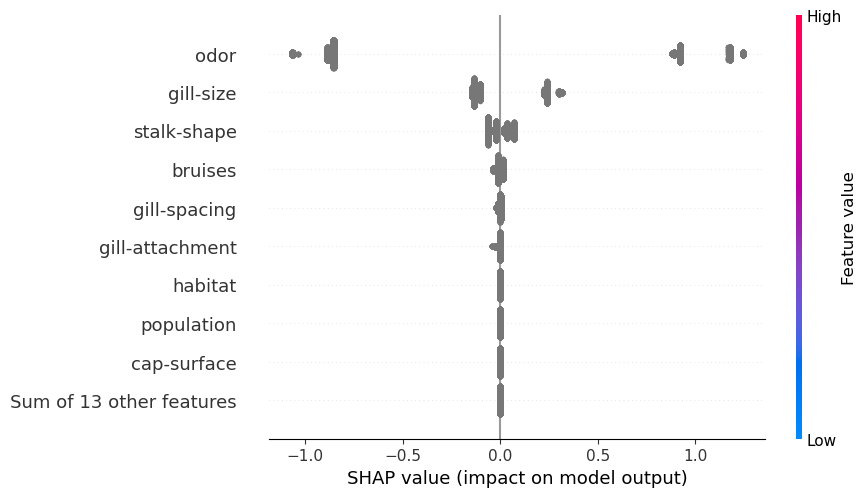

In [89]:
shap.plots.beeswarm(shap_values ,show=False)

# plt.savefig('../../../figures/beeswarm.png', dpi=100, bbox_inches='tight',  facecolor='white')
plt.show()

In [14]:
shap_values 

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

.base_values =
array([0.2629663, 0.2629663, 0.2629663, ..., 0.2629663, 0.2629663,
       0.2629663])

.data =
array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

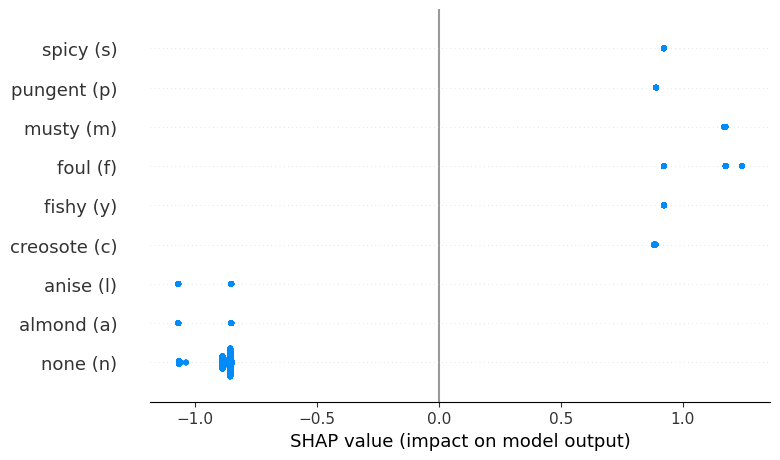

In [15]:
# Create for placeholder SHAP values
shap_values_odor = explainer(X)

# Get shaply values and feature values for odor
odor_values = np.array(shap_values[:,4].values) 
odor_data = X['odor']

# Create new SHAP values array

# Split odor SHAP values by unique odor categories
unique_odor = ['a','l','c','y','f','m','n','p','s']
new_shap_values = [np.array(pd.Series(odor_values)[odor_data==odor]) for odor in unique_odor]

# Each sublist needs to be the same length
max_len = max([len(v) for v in new_shap_values])
new_shap_values = [np.append(vs,[np.nan]*(max_len - len(vs))) for vs in new_shap_values]
new_shap_values = np.array(new_shap_values)

# transpost matrix so categories are columns and SHAP values are rows
new_shap_values = new_shap_values.transpose()

# replace shap values
shap_values_odor.values = np.array(new_shap_values)

# replace data with placeholder array
shap_values_odor.data = np.array([[0]*len(unique_odor)]*max_len)

# replace base data with placeholder array
shap_values_odor.base = np.array([0]*max_len)

# replace feature names with category labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}
labels = ["{} ({})".format(odor_labels[u],u) for u in unique_odor]
shap_values_odor.feature_names = list(labels)

# Use besswarm as before
shap.plots.beeswarm(shap_values_odor,color_bar=False,show=False)

plt.savefig('../../../figures/beeswarm_odor.png', dpi=100, bbox_inches='tight',  facecolor='white')
plt.show()

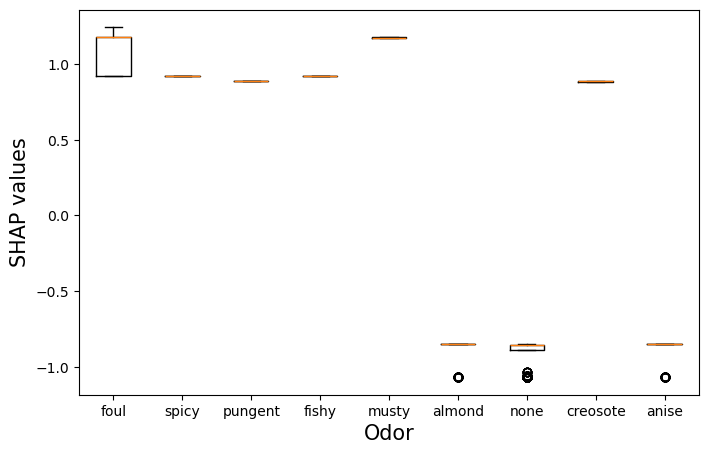

In [16]:
# get shaply values and data
odor_values = shap_values[:,4].values
odor_data = X['odor']
unique_odor = set(X['odor'])

# split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
# replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

# plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('SHAP values',size=15)
plt.xlabel('Odor',size=15)

plt.savefig('../../../figures/boxplot.png', dpi=100, bbox_inches='tight',  facecolor='white')
plt.show()